In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nn-assignment/testset.csv
/kaggle/input/nn-assignment/samplesubmission.csv
/kaggle/input/nn-assignment/trainset.csv


In [2]:
data = pd.read_csv("/kaggle/input/nn-assignment/trainset.csv")
#randomly shuffle data
data = data.sample(frac = 1) 
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18879,9,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
8820,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23937,7,0,0,0,0,0,0,0,0,255,...,0,0,0,0,0,0,0,0,0,0
1476,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15264,4,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,0,0,0,0,0
19348,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23579,9,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,0,0,0


In [3]:
validation_data_percentage = 0.2
validation_data_amount = round(validation_data_percentage * len(data))
validation_data_amount

5600

In [4]:
def reshape_input(input_data):
    return np.reshape(input_data, (len(input_data), 28, 28, 1))

def normalize(input_data):
    return input_data / 255.0

def preprocess(input_data):
    return normalize(reshape_input(input_data))

X = data.drop(columns='label').values
Y = data.loc[:,'label'].values

X = preprocess(X)

validation_X = X[:validation_data_amount]
validation_Y = Y[:validation_data_amount]
train_X = X[validation_data_amount:]
train_Y = Y[validation_data_amount:]

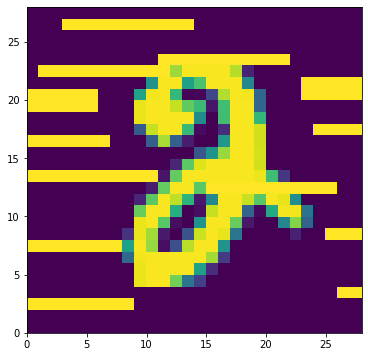

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plot_data = np.reshape(data.drop(columns='label').values, (len(data.drop(columns='label').values), 28, 28))
plt.pcolor(plot_data[6][::-1][:])
plt.show()

In [6]:
from tensorflow.keras import datasets, layers, models
import keras

shape = train_X[0].shape


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [7]:
from keras import losses
# Read more https://keras.io/api/optimizers/
optimizer = 'adam' # sdg, rmsprop, adam, adadelta, adagrad, adamax, nadam, ftrl
# Read more https://www.tutorialspoint.com/keras/keras_model_compilation.htm
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
# Read more at https://www.tutorialspoint.com/keras/keras_model_compilation.htm
metrics = ['accuracy'] # accuracy, binary_accuracy, categorical_accuracy, ...

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)


epochs = 15
shuffle = True # True, False or "batch"
batch_size = 32 # Integer or None -> default 32
callbacks = [] # List of callbacks during training

history = model.fit(train_X, train_Y, 
                    validation_data=(validation_X, validation_Y),
                    epochs=epochs,
                    shuffle=shuffle,
                    batch_size=batch_size,
                    callbacks=callbacks)

Epoch 1/15
700/700 [==============================] - 12s 17ms/step - loss: 1.7676 - accuracy: 0.6979 - val_loss: 1.5428 - val_accuracy: 0.9195
Epoch 2/15
700/700 [==============================] - 11s 16ms/step - loss: 1.5487 - accuracy: 0.9154 - val_loss: 1.5261 - val_accuracy: 0.9352
Epoch 3/15
700/700 [==============================] - 11s 16ms/step - loss: 1.5251 - accuracy: 0.9375 - val_loss: 1.5113 - val_accuracy: 0.9493
Epoch 4/15
700/700 [==============================] - 11s 16ms/step - loss: 1.5136 - accuracy: 0.9487 - val_loss: 1.5112 - val_accuracy: 0.9507
Epoch 5/15
700/700 [==============================] - 11s 16ms/step - loss: 1.5088 - accuracy: 0.9531 - val_loss: 1.4994 - val_accuracy: 0.9620
Epoch 6/15
700/700 [==============================] - 12s 17ms/step - loss: 1.5021 - accuracy: 0.9598 - val_loss: 1.5121 - val_accuracy: 0.9482
Epoch 7/15
700/700 [==============================] - 11s 16ms/step - loss: 1.4991 - accuracy: 0.9625 - val_loss: 1.5026 - val_accuracy:

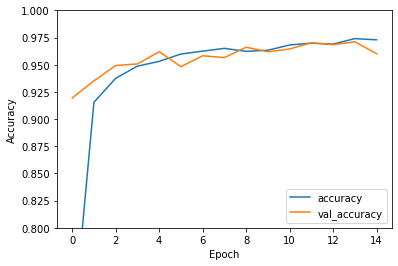

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

In [9]:
test_data_unprocessed = pd.read_csv("/kaggle/input/nn-assignment/testset.csv")
test_data_X = preprocess(test_data_unprocessed.values)

prediction = model.predict(test_data_X)

<Figure size 720x720 with 0 Axes>

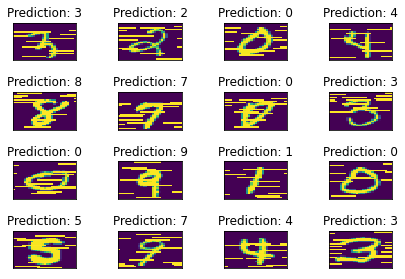

In [10]:
import random
plot_data = np.reshape(test_data_unprocessed.values, (len(test_data_unprocessed.values), 28, 28))

subplots_x = 4
subplots_y = 4



plt.figure(figsize=(10,10))
fig, ax =  plt.subplots(subplots_y, subplots_x)
fig.tight_layout()

randomlist = random.sample(range(0, len(plot_data)), subplots_x * subplots_y)
r_index = 0

for x in range(subplots_x):
    for y in range(subplots_y):
        index = randomlist[r_index]
        ax[y][x].axes.xaxis.set_visible(False)
        ax[y][x].axes.yaxis.set_visible(False)
        ax[y][x].pcolor(plot_data[index][::-1][:])
        ax[y][x].set_title('Prediction: {}'.format(np.argmax(prediction[index])))
        r_index += 1
plt.show()

In [11]:
# generating the result file
result = np.argmax(prediction[:], axis = 1 )

df = pd.DataFrame(result)
df.index += 1
df.to_csv("prediction.csv", index_label="ImageId", header=["Label"])

# load data again to test correct file format
pd.read_csv("prediction.csv")

,ImageId,Label
0,1,3
1,2,1
2,3,3
3,4,8
4,5,0
...,...,...
13995,13996,0
13996,13997,1
13997,13998,7
13998,13999,6
